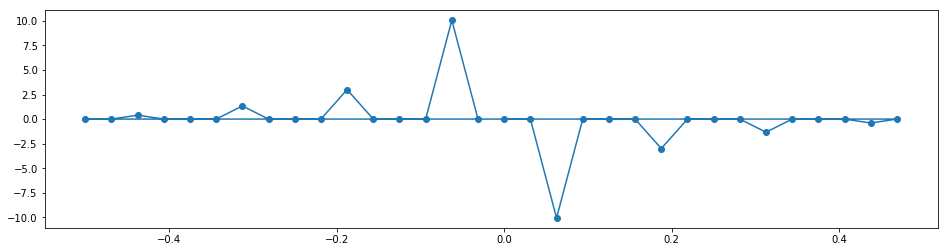

16.0


In [302]:
import numpy as np
import matplotlib.pyplot as plt


data=[]
data.extend([1]*8)
data.extend([0]*8)
data.extend([1]*8)
data.extend([0]*8)

t = np.arange(len(data))

y = np.array(data)
res = np.fft.fft(y)
freq = np.fft.fftfreq(t.shape[-1])

plt.figure(figsize=(16,4))
plt.plot(freq, (res.imag), marker = 'o')
#plt.plot(freq, abs(res.real))
plt.show()

index_of_max_val = list(res.imag).index(max(res.imag))
T = 1 / abs(freq[index_of_max_val])
print T

In [303]:
# make cpu stats data

import random

NR_SAMPLES_PER_HOUR = 6
# 10 minutes
MINUTES_BETWEEN_SAMPLES = 60 / NR_SAMPLES_PER_HOUR

def get_cpu_stats():
    def create_stats_list(start, stop, hours):
        # 0.0 ~ 1.0 -> 0% ~ 100%
        return [random.randrange(start, stop) / 100.0 for i in range(hours * NR_SAMPLES_PER_HOUR)]
    stats = []

    hours = range(0, 5)
    stats.extend(create_stats_list(5, 20, len(hours)))
    hours = range(5, 19)
    stats.extend(create_stats_list(60, 100, len(hours)))
    hours = range(19, 24)
    stats.extend(create_stats_list(5, 20, len(hours)))

    return stats

    # add noises
    for i in range(20):
        index = random.randrange(0,len(stats))
        if stats[index] > 0.5:
            stats[index] = random.randrange(10, 30) / 100.0
        else:
            stats[index] = random.randrange(80, 90) / 100.0

    return stats

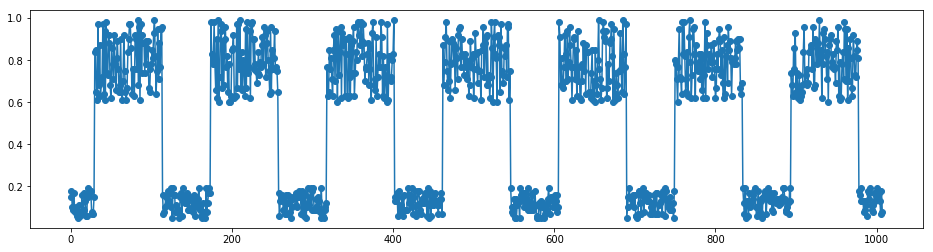

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline  

stats = []
for day in range(7):
    stats.extend(get_cpu_stats())

x = range(len(stats))
y = stats

plt.figure(figsize=(16,4))
plt.plot(x, y, marker = 'o')
plt.show()

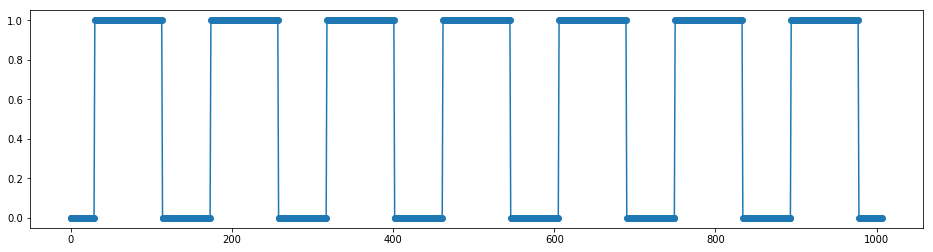

In [305]:
stats_maps =  [1 if p > 0.4 else 0 for p in stats]

x = range(len(stats_maps))
y = stats_maps

plt.figure(figsize=(16,4))
plt.plot(x, stats_maps, marker = 'o')
plt.show()

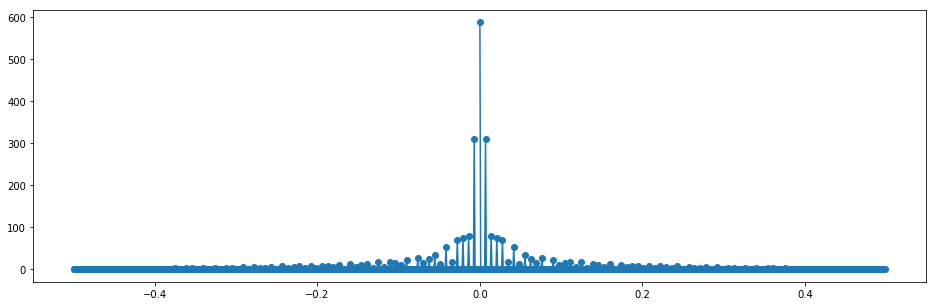

In [306]:
import numpy as np

fft_stats = np.fft.fft(stats_maps)

freq = np.fft.fftfreq(len(fft_stats))
real = fft_stats.real
imag = fft_stats.imag

plt.figure(figsize=(16,5))
plt.plot(freq, abs(real), marker = 'o')
plt.show()

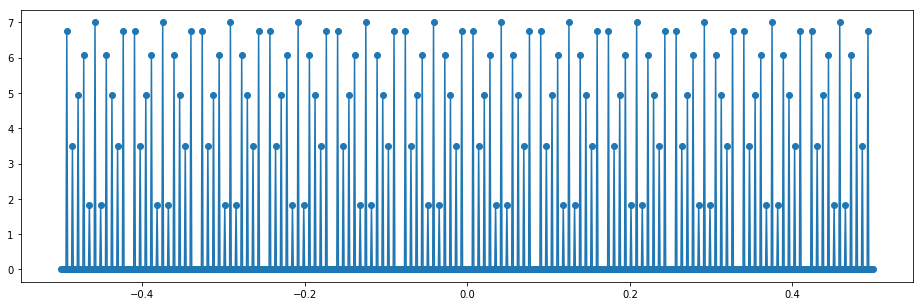

In [307]:
plt.figure(figsize=(16,5))
plt.plot(freq, abs(imag), marker = 'o')
plt.show()

In [309]:
index_of_max_val = list(imag).index(max(imag))
T = 1 / abs(freq[index_of_max_val])
print max(imag)
print index_of_max_val
print T

7.000000000000149
966
24.0
